# Delicious Asian and Indian Cuisines 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from imblearn.over_sampling import SMOTE

In [3]:
df  = pd.read_csv('../data/cuisines.csv')
df.head()

,Unnamed: 0,cuisine,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,65,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,66,indian,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,67,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,68,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,69,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2448 entries, 0 to 2447
Columns: 385 entries, Unnamed: 0 to zucchini
dtypes: int64(384), object(1)
memory usage: 7.2+ MB


<Axes: ylabel='cuisine'>

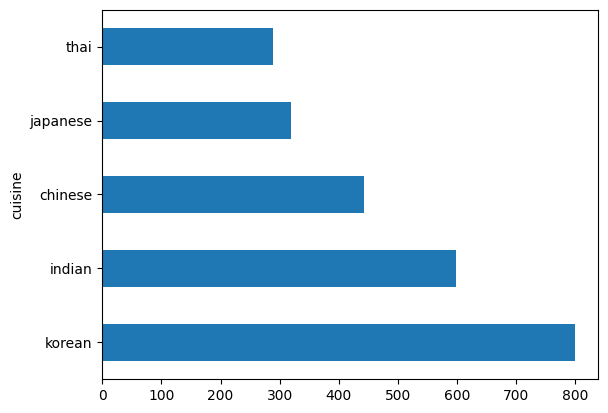

In [ ]:
df.cuisine.value_counts().plot.barh()
# df.cusine 表示选去df的cusine列
# value_counts() 统计每个唯一值出现的次数
# 相关参数 normalize表示相对频率/比例， sort 按照计数排序， ascending 升序排列， dropna 排除缺失值
# plot.barh 是pandas内置的绘图函数，生成水平条形图

In [ ]:
thai_df = df[(df.cuisine == "thai")]
japanese_df = df[(df.cuisine == "japanese")]
chinese_df = df[(df.cuisine == "chinese")]
indian_df = df[(df.cuisine == "indian")]
korean_df = df[(df.cuisine == "korean")]

# df[(df.cuisine == "thai")] 就会返回所有 cuisine 列为 "thai" 的行

print(f'thai df: {thai_df.shape}')
print(f'japanese df: {japanese_df.shape}')
print(f'chinese df: {chinese_df.shape}')
print(f'indian df: {indian_df.shape}')
print(f'korean df: {korean_df.shape}')

# 289 表示 thai_df 这个 DataFrame 有 289 行，也就是有 289 条泰国菜的数据。
# 385 表示 thai_df 有 385 列，也就是每条数据有 385 个字段。

thai df: (289, 385)
japanese df: (320, 385)
chinese df: (442, 385)
indian df: (598, 385)
korean df: (799, 385)


In [ ]:
def create_ingredient_df(df):
    ingredient_df = df.T.drop(['cuisine', 'Unamed: 0']).sum(axis=1).to_frame(name='value')
    # df.T 表示转置； sum和to_frame表示将统计结果汇总成value列
    ingredient_df = ingredient_df[(ingredient_df.T != 0)]